In [1]:
import pandas as pd
import numpy as np
import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
from itertools import combinations, groupby
warnings.filterwarnings("ignore")
import networkx as nx
%matplotlib inline
#plt.style.use('seaborn-darkgrid')
from collections import Counter
from matplotlib.cm import ScalarMappable
import matplotlib.ticker as mticker

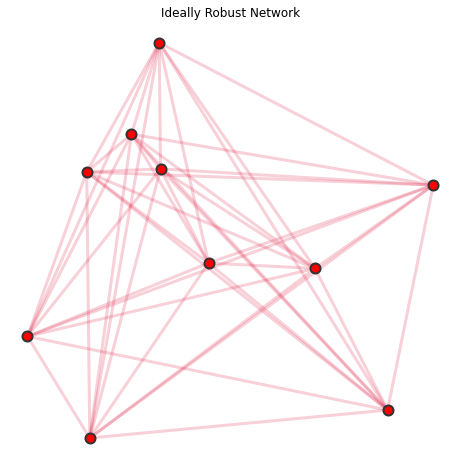

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a fully connected graph with 50 nodes
G = nx.complete_graph(10)

# Define positions using Kamada-Kawai layout
#pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G)
pos = nx.random_layout(G)

# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

# Draw nodes and edges using provided code
nx.draw_networkx_nodes(G, pos, ax=axes, node_size=100, linewidths= 2,
                       node_color='red', edgecolors='#333333')
nx.draw_networkx_edges(G, pos, ax=axes, edge_color='crimson',
                       alpha=0.2, width=3)
axes.set_title("Ideally Robust Network")
axes.set_axis_off()

# Show the plot
plt.show()

In [2]:
df1=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Washington_DC\Edge_CSV.csv")
df2=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Boston_MBTA\Edge_CSV.csv")
df3=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Chicago_L\Edge_CSV.csv")
df4=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Delhi_Metro\Edge_CSV.csv")
df5=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Tokyo_Metro\Edge_CSV.csv")
df6=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Paris_Metro\Edge_CSV.csv")
df7=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\Shanghai_Metro\Edge_CSV.csv")
df8=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\London_Metro\Edges_all.csv",encoding='latin-1')
df9=pd.read_csv(r"A:\Spring 2020\Rough Works\Japan Metro\New_York_MTA\Edge_CSV.csv",encoding='latin-1')

In [3]:
edge_list_W = list(zip(df1['Source'], df1['Target']))
edge_list_B = list(zip(df2['Source'], df2['Target']))
edge_list_C = list(zip(df3['Source'], df3['Target']))
edge_list_D = list(zip(df4['Source'], df4['Target']))
edge_list_T = list(zip(df5['Source'], df5['Target']))
edge_list_P = list(zip(df6['Source'], df6['Target']))
edge_list_S = list(zip(df7['Source'], df7['Target']))
edge_list_L = list(zip(df8['Source'], df8['Target']))
edge_list_N = list(zip(df9['Source'], df9['Target']))

In [4]:
G_W = nx.Graph()
G_W.add_edges_from(edge_list_W)

G_B = nx.Graph()
G_B.add_edges_from(edge_list_B)

G_C = nx.Graph()
G_C.add_edges_from(edge_list_C)

G_D = nx.Graph()
G_D.add_edges_from(edge_list_D)

G_T = nx.Graph()
G_T.add_edges_from(edge_list_T)

G_P = nx.Graph()
G_P.add_edges_from(edge_list_P)

G_S = nx.Graph()
G_S.add_edges_from(edge_list_S)

G_L = nx.Graph()
G_L.add_edges_from(edge_list_L)

G_N = nx.Graph()
G_N.add_edges_from(edge_list_N)

In [5]:
# Node & Edge List of Graphs
node_list_W = list(G_W.nodes())
node_list_B = list(G_B.nodes())
node_list_C = list(G_C.nodes())
node_list_D = list(G_D.nodes())
node_list_T = list(G_T.nodes())
node_list_P = list(G_P.nodes())
node_list_S = list(G_S.nodes())
node_list_L = list(G_L.nodes())
node_list_N = list(G_N.nodes())
# --------------->><<-------------------

edge_list_W = list(G_W.edges())
edge_list_B = list(G_B.edges())
edge_list_C = list(G_C.edges())
edge_list_D = list(G_D.edges())
edge_list_T = list(G_T.edges())
edge_list_P = list(G_P.edges())
edge_list_S = list(G_S.edges())
edge_list_L = list(G_L.edges())
edge_list_N = list(G_N.edges())

In [6]:
graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N]
for graph in graphs:
    print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 91
Number of edges: 93
Average degree:   2.0440
Name: 
Type: Graph
Number of nodes: 114
Number of edges: 115
Average degree:   2.0175
Name: 
Type: Graph
Number of nodes: 143
Number of edges: 149
Average degree:   2.0839
Name: 
Type: Graph
Number of nodes: 205
Number of edges: 216
Average degree:   2.1073
Name: 
Type: Graph
Number of nodes: 223
Number of edges: 268
Average degree:   2.4036
Name: 
Type: Graph
Number of nodes: 302
Number of edges: 358
Average degree:   2.3709
Name: 
Type: Graph
Number of nodes: 345
Number of edges: 397
Average degree:   2.3014
Name: 
Type: Graph
Number of nodes: 369
Number of edges: 430
Average degree:   2.3306
Name: 
Type: Graph
Number of nodes: 463
Number of edges: 510
Average degree:   2.2030


In [7]:
import copy


def calculate_gc_size(graph):
    """
    Returns the giant component size.
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: (list)

    edge_list: (list)

    Returns list of GC sizes and the graph remaining 
    """

    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    initial_gc_size = calculate_gc_size(G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        gc_list.append(calculate_gc_size(updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    gc_list.append(0)
    
    return gc_list, updated_G


def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    initial_gc_size = calculate_gc_size(G)
    
    re_gc_list.append(0)
    
    for node in nodes_to_add:
        
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
        re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G

def normalize_gc_list(gc_list):
    "calculates gc size as a fraction of initial gc"
    
    return np.array(gc_list)/max(gc_list)


# Ideally Robust Network

In [5]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15
node_r_list_N = list(G.nodes())
edge_list_N = list(G.edges())

b_cen_N = nx.closeness_centrality(G)                                                    #Every Iter 2
b_cen_N = {k: v for k, v in sorted(b_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_r_list_N = list(b_cen_N.keys()) #Every Iter2

gcc_sizes_N, updated_G = remove_nodes(G, node_r_list_N, edge_list_N) #Every Iter4

gcc_sizes_N = normalize_gc_list(gcc_sizes_N) #Every Iter2

node_fracf_T_N = np.arange(len(gcc_sizes_N))/(len(gcc_sizes_N)-1)  #Every Iter3




In [53]:
gcc_sizes_N

array([1.        , 0.66666667, 0.33333333, 0.33333333, 0.        ])

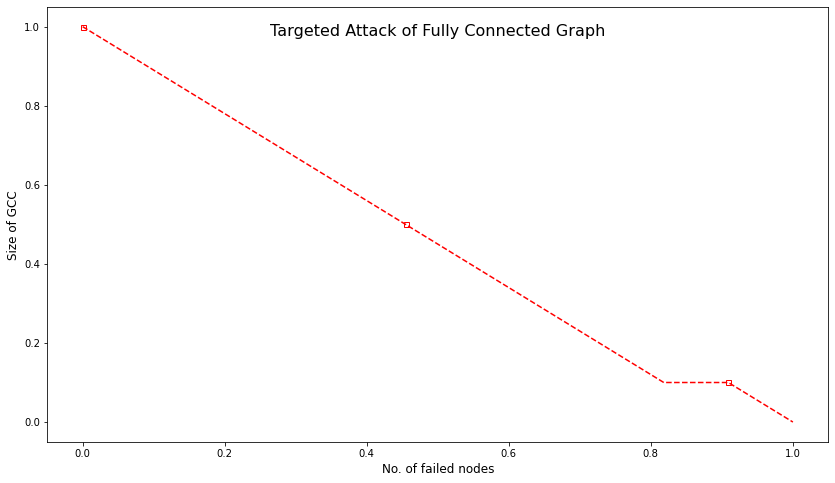

In [7]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_N,gcc_sizes_N,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Targeted Attack of Fully Connected Graph', y=0.92, fontsize='16')
plt.savefig(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Ideally_Rob_Tar.png')
plt.show()

## DomiRank Centrality

In [12]:
def process_iteration(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling):
    tf, domiDist = domirank(spArray, sigma, dt = dt, epsilon = epsilon, maxIter = maxIter, checkStep = checkStep)
    domiAttack = generate_attack(domiDist)
    ourTempAttack, __ = network_attack_sampled(spArray, domiAttack, sampling = sampling)
    finalErrors = ourTempAttack.sum()
    q.put(finalErrors)

def optimal_sigma(spArray, endVal = 0, startval = 0.000001, iterationNo = 100, dt = 0.1, epsilon = 1e-5, maxIter = 100, checkStep = 10, maxDepth = 100, sampling = 0):
    ''' This part finds the optimal sigma by searching the space, here are the novel parameters:
    spArray: is the input sparse array/matrix for the network.
    startVal: is the starting value of the space that you want to search.
    endVal: is the ending value of the space that you want to search (normally it should be the eigenvalue)
    iterationNo: the number of partitions of the space between lambN that you set
    
    return : the function returns the value of sigma - the numerator of the fraction of (\sigma)/(-1*lambN)
    '''
    if endVal == 0:
        endVal = find_eigenvalue(spArray, maxDepth = maxDepth, dt = dt, epsilon = epsilon, maxIter = maxIter, checkStep = checkStep)
    import multiprocessing as mp
    endval = -0.9999/endVal
    tempRange = np.arange(startval, endval + (endval-startval)/iterationNo, (endval-startval)/iterationNo)
    processes = []
    q = mp.Queue()
    for i, sigma in enumerate(tempRange):
        p = mp.Process(target=process_iteration, args=(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling))
        p.start()
        processes.append(p)

    results = []
    for p in processes:
        p.join()
        result = q.get()
        results.append(result)
    finalErrors = np.array(results)
    minEig = np.where(finalErrors == finalErrors.min())[0][-1]
    minEig = tempRange[minEig]
    return minEig, finalErrors

######## Beginning of domirank stuff! ####################

def domirank(G, sigma = -1, dt = 0.1, epsilon = 1e-5, maxIter = 1000, checkStep = 10):
    '''
    G is the input graph as a (preferably) sparse array.
    This solves the dynamical equation presented in the Paper: "DomiRank Centrality: revealing structural fragility of
complex networks via node dominance" and yields the following output: bool, DomiRankCentrality
    Here, sigma needs to be chosen a priori.
    dt determines the step size, usually, 0.1 is sufficiently fine for most networks (could cause issues for networks
    with an extremely high degree, but has never failed me!)
    maxIter is the depth that you are searching with in case you don't converge or diverge before that.
    Checkstep is the amount of steps that you go before checking if you have converged or diverged.
    
    
    This algorithm scales with O(m) where m is the links in your sparse array.
    '''
    if type(G) == nx.classes.graph.Graph: #check if it is a networkx Graph
        G = nx.to_scipy_sparse_array(G) #convert to scipy sparse if it is a graph 
    else:
        G = G.copy()
    if sigma == -1:
        sigma = optimal_sigma(G, dt=dt, epsilon=epsilon, maxIter = maxIter, checkstep = checkstep) 
    pGAdj = sigma*G.astype(np.float32)
    Psi = np.zeros(pGAdj.shape[0]).astype(np.float32)
    maxVals = np.zeros(int(maxIter/checkStep)).astype(np.float32)
    dt = np.float32(dt)
    j = 0
    boundary = epsilon*pGAdj.shape[0]*dt
    for i in range(maxIter):
        tempVal = ((pGAdj @ (1-Psi)) - Psi)*dt
        Psi += tempVal.real
        if i% checkStep == 0:
            if np.abs(tempVal).sum() < boundary:
                break
            maxVals[j] = tempVal.max()
            if i == 0:
                initialChange = maxVals[j]
            if j > 0:
                if maxVals[j] > maxVals[j-1] and maxVals[j-1] > maxVals[j-2]:
                    return False, Psi
            j+=1

    return True, Psi

In [13]:
import scipy.sparse as sp

# Assuming your graph G_W is already created
# Convert G_W to a scipy sparse matrix
G_W_sparse = nx.to_scipy_sparse_matrix(G_W)

# Calculate DomiRank centrality
converged, dr_cen_W_array = domirank(G_W_sparse)

# Check if the calculation converged
if not converged:
    print("DomiRank calculation did not converge. Adjust parameters and try again.")
else:
    # Convert the array to a dictionary with node labels
    dr_cen_W = {node: dr_cen_W_array[i] for i, node in enumerate(G_W.nodes)}

    # Sort the centrality values in descending order
    dr_cen_W = {k: v for k, v in sorted(dr_cen_W.items(), key=lambda item: item[1], reverse=True)}

    # Now dr_cen_W holds the DomiRank centrality scores for each node, sorted from highest to lowest



NameError: name 'checkstep' is not defined

In [9]:
dr_cen_G

{67: 0,
 64: 0,
 77: 0,
 89: 0,
 41: 0,
 50: 0,
 7: 0,
 35: 0,
 76: 0,
 82: 0,
 15: 0,
 91: 0,
 23: 0,
 27: 0,
 51: 0,
 36: 0,
 43: 0,
 80: 0,
 58: 0,
 63: 0,
 10: 0,
 33: 0,
 75: 0,
 69: 0,
 32: 0,
 88: 0,
 38: 0,
 34: 0,
 81: 0,
 44: 0,
 8: 0,
 65: 0,
 20: 0,
 60: 0,
 59: 0,
 4: 0,
 66: 0,
 31: 0,
 28: 0,
 49: 0,
 30: 0,
 70: 0,
 45: 0,
 29: 0,
 12: 0,
 25: 0,
 61: 0,
 73: 0,
 6: 0,
 11: 0,
 1: 0,
 53: 0,
 47: 0,
 83: 0,
 22: 0,
 86: 0,
 24: 0,
 5: 0,
 84: 0,
 14: 0,
 19: 0,
 52: 0,
 21: 0,
 13: 0,
 46: 0,
 57: 0,
 42: 0,
 26: 0,
 3: 0,
 54: 0,
 68: 0,
 79: 0,
 17: 0,
 37: 0,
 9: 0,
 74: 0,
 56: 0,
 71: 0,
 18: 0,
 2: 0,
 55: 0,
 85: 0,
 87: 0,
 62: 0,
 16: 0,
 39: 0,
 90: 0,
 72: 0,
 40: 0,
 78: 0,
 48: 0}

In [ ]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

dr_cen_N = nx.pagerank(G_N)                                                    #Every Iter 2
dr_cen_N = {k: v for k, v in sorted(dr_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_r_list_N = list(p_cen_N.keys()) #Every Iter2

gcc_sizes_N, updated_G_N = remove_nodes(G_N, node_r_list_N, edge_list_N) #Every Iter4

gcc_sizes_N = normalize_gc_list(gcc_sizes_N) #Every Iter2

node_fracf_T_N = np.arange(len(gcc_sizes_N))/(len(gcc_sizes_N)-1)  #Every Iter3

## Betweenness Centrality

In [37]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

p_cen_N = nx.pagerank(G_N)                                                    #Every Iter 2
p_cen_N = {k: v for k, v in sorted(p_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_r_list_N = list(p_cen_N.keys()) #Every Iter2

gcc_sizes_N, updated_G_N = remove_nodes(G_N, node_r_list_N, edge_list_N) #Every Iter4

gcc_sizes_N = normalize_gc_list(gcc_sizes_N) #Every Iter2

node_fracf_T_N = np.arange(len(gcc_sizes_N))/(len(gcc_sizes_N)-1)  #Every Iter3




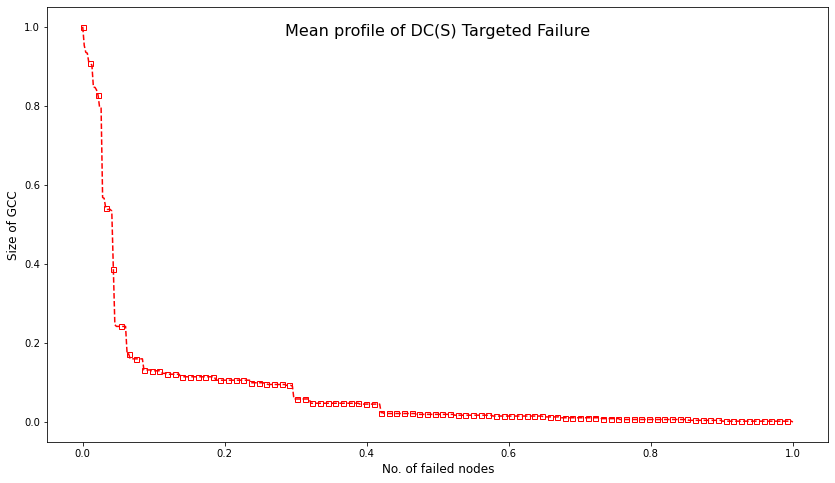

In [38]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_N,gcc_sizes_N,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Mean profile of DC(S) Targeted Failure', y=0.92, fontsize='16')
plt.show()

In [12]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\W_Target_Top.npz',node_fracf_T_W,gcc_sizes_W)

In [18]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\B_Target_Top.npz',node_fracf_T_B,gcc_sizes_B)

In [21]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\C_Target_Top.npz',node_fracf_T_C,gcc_sizes_C)

In [24]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\D_Target_Top.npz',node_fracf_T_D,gcc_sizes_D)

In [27]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\T_Target_Top.npz',node_fracf_T_T,gcc_sizes_T)

In [30]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\P_Target_Top.npz',node_fracf_T_P,gcc_sizes_P)

In [33]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\S_Target_Top.npz',node_fracf_T_S,gcc_sizes_S)

In [36]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\L_Target_Top.npz',node_fracf_T_L,gcc_sizes_L)

In [39]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\N_Target_Top.npz',node_fracf_T_N,gcc_sizes_N)

## Closeness centrality

In [33]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

c_cen_W = nx.closeness_centrality(G_W)                                                    #Every Iter 2
c_cen_W = {k: v for k, v in sorted(c_cen_W.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_c_list_W = list(c_cen_W.keys()) #Every Iter2

gcc_sizes_c_W, updated_G_W = remove_nodes(G_W, node_c_list_W, edge_list_W) #Every Iter5

gcc_sizes_c_W = normalize_gc_list(gcc_sizes_c_W) #Every Iter2

node_fracf_T_c_W = np.arange(len(gcc_sizes_c_W))/(len(gcc_sizes_c_W)-1)  #Every Iter3


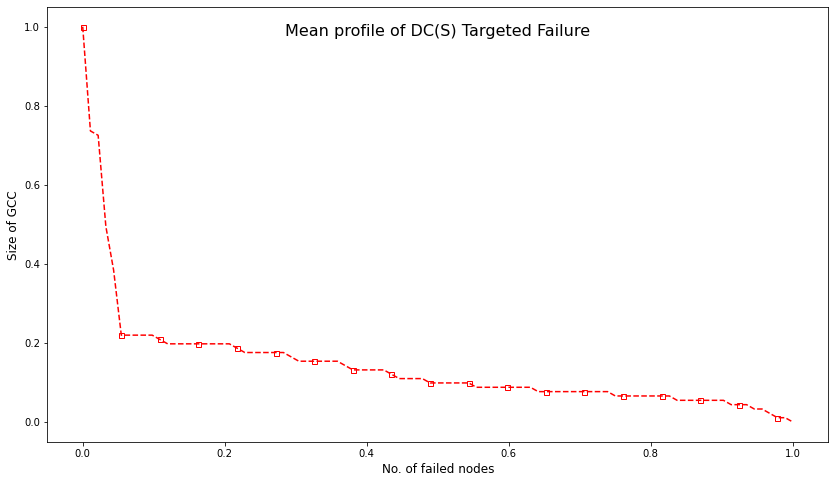

In [34]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_c_W,gcc_sizes_c_W,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Mean profile of DC(S) Targeted Failure', y=0.92, fontsize='16')
plt.show()

## Pagerank centrality

In [39]:
#nx.pagerank
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

p_cen_T = nx.pagerank(G_T)                                                    #Every Iter 2
p_cen_T = {k: v for k, v in sorted(p_cen_T.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_p_list_T = list(p_cen_T.keys()) #Every Iter2

gcc_sizes_p_T, updated_G = remove_nodes(G_T, node_p_list_T, edge_list_T) #Every Iter4

gcc_sizes_p_T = normalize_gc_list(gcc_sizes_p_T) #Every Iter2

node_fracf_T_p_T = np.arange(len(gcc_sizes_p_T))/(len(gcc_sizes_p_T)-1)  #Every Iter3



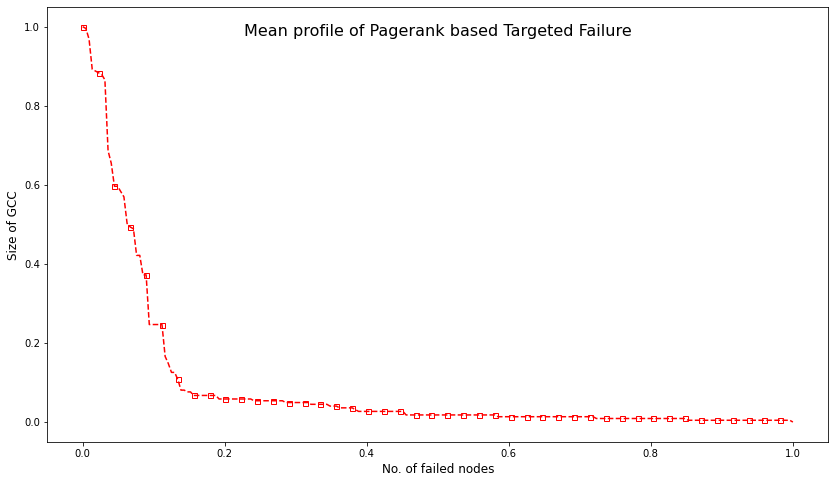

In [40]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_p_T,gcc_sizes_p_T,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Mean profile of Pagerank based Targeted Failure', y=0.92, fontsize='16')
plt.show()

In [42]:
#Pagerank
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\N_Target_p_Top.npz',node_fracf_T_p_N,gcc_sizes_p_N)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\L_Target_p_Top.npz',node_fracf_T_p_L,gcc_sizes_p_L)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\S_Target_p_Top.npz',node_fracf_T_p_S,gcc_sizes_p_S)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\P_Target_p_Top.npz',node_fracf_T_p_P,gcc_sizes_p_P)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\T_Target_p_Top.npz',node_fracf_T_p_T,gcc_sizes_p_T)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\D_Target_p_Top.npz',node_fracf_T_p_D,gcc_sizes_p_D)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\C_Target_p_Top.npz',node_fracf_T_p_C,gcc_sizes_p_C)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\B_Target_p_Top.npz',node_fracf_T_p_B,gcc_sizes_p_B)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Pagerank_C\W_Target_p_Top.npz',node_fracf_T_p_W,gcc_sizes_p_W)



In [10]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\N_Target_c_Top.npz',node_fracf_T_c_N,gcc_sizes_c_N)

In [13]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\L_Target_c_Top.npz',node_fracf_T_c_L,gcc_sizes_c_L)

In [17]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\S_Target_c_Top.npz',node_fracf_T_c_S,gcc_sizes_c_S)

In [20]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\P_Target_c_Top.npz',node_fracf_T_c_P,gcc_sizes_c_P)

In [23]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\T_Target_c_Top.npz',node_fracf_T_c_T,gcc_sizes_c_T)

In [26]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\D_Target_c_Top.npz',node_fracf_T_c_D,gcc_sizes_c_D)

In [29]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\C_Target_c_Top.npz',node_fracf_T_c_C,gcc_sizes_c_C)

In [32]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\B_Target_c_Top.npz',node_fracf_T_c_B,gcc_sizes_c_B)

In [35]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\W_Target_c_Top.npz',node_fracf_T_c_W,gcc_sizes_c_W)

## Eigenvector Centrality

In [41]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

e_cen_T = nx.eigenvector_centrality(G_T, max_iter=1000)                                                    #Every Iter 2
e_cen_T = {k: v for k, v in sorted(e_cen_T.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_e_list_T = list(e_cen_T.keys()) #Every Iter2

gcc_sizes_e_T, updated_G = remove_nodes(G_T, node_e_list_T, edge_list_T) #Every Iter4

gcc_sizes_e_T = normalize_gc_list(gcc_sizes_e_T) #Every Iter2

node_fracf_T_e_T = np.arange(len(gcc_sizes_e_T))/(len(gcc_sizes_e_T)-1)  #Every Iter3



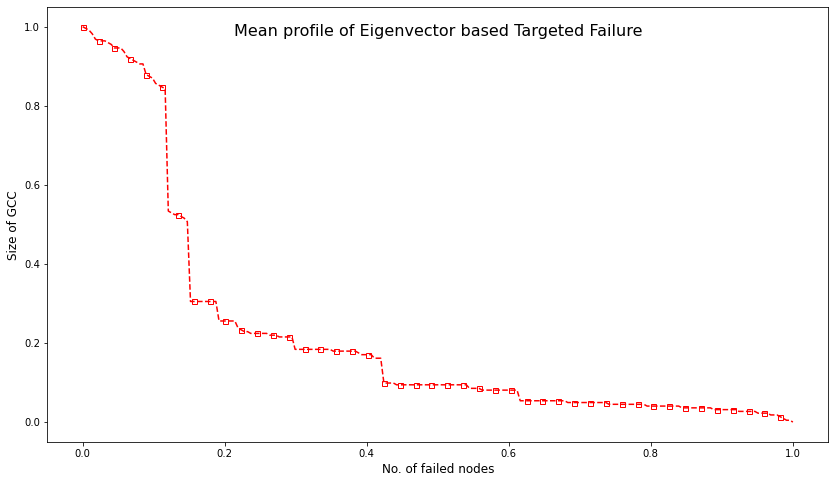

In [42]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_e_T,gcc_sizes_e_T,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Mean profile of Eigenvector based Targeted Failure', y=0.92, fontsize='16')
plt.show()

In [43]:
#Eigenvector
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\N_Target_e_Top.npz',node_fracf_T_e_N,gcc_sizes_e_N)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\L_Target_e_Top.npz',node_fracf_T_e_L,gcc_sizes_e_L)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\S_Target_e_Top.npz',node_fracf_T_e_S,gcc_sizes_e_S)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\P_Target_e_Top.npz',node_fracf_T_e_P,gcc_sizes_e_P)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\T_Target_e_Top.npz',node_fracf_T_e_T,gcc_sizes_e_T)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\D_Target_e_Top.npz',node_fracf_T_e_D,gcc_sizes_e_D)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\C_Target_e_Top.npz',node_fracf_T_e_C,gcc_sizes_e_C)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\B_Target_e_Top.npz',node_fracf_T_e_B,gcc_sizes_e_B)
#np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\W_Target_e_Top.npz',node_fracf_T_e_W,gcc_sizes_e_W)


In [2]:
## Normalized URTS Betweenness Centrality
l_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\W_Target_Top.npz')  # Ref
# --------------->><<-------------------
l_B=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\B_Target_Top.npz')
# --------------->><<-------------------
l_C=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\C_Target_Top.npz')
# --------------->><<-------------------
l_D=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\D_Target_Top.npz')
# --------------->><<-------------------
l_T=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\T_Target_Top.npz')
# --------------->><<-------------------
l_P=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\P_Target_Top.npz')
# --------------->><<-------------------
l_S=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\S_Target_Top.npz')
# --------------->><<-------------------
l_L=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\L_Target_Top.npz')
#---------------->><<--------------------
l_N=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\N_Target_Top.npz')
#---------------->><<--------------------
dr_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Domirank_C\W_Target_dom.npz')

In [5]:
labels=["WDC","Boston","Chicago","Delhi","Tokyo","Paris", "Shanghai", "London","New York"]
colors = ['crimson', 'olive', 'dodgerblue', 'magenta', 'darkorange', 'limegreen', 'royalblue', 'gold', 'mediumvioletred']

plt.figure(figsize=[15,9],dpi=800)  #,dpi=200

plt.plot(l_W['arr_0'],l_W['arr_1'],color=colors[0], label=labels[0],markevery=15, markerfacecolor='none', markersize=5)
plt.plot(dr_W['arr_0'],dr_W['arr_1'],color=colors[1], label=labels[2],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_B['arr_0'],l_B['arr_1'],color=colors[1], label=labels[1],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_C['arr_0'],l_C['arr_1'],color=colors[2], label=labels[2],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_D['arr_0'],l_D['arr_1'],color=colors[3], label=labels[3],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_T['arr_0'],l_T['arr_1'],color=colors[4], label=labels[4],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_P['arr_0'],l_P['arr_1'],color=colors[5], label=labels[5],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_S['arr_0'],l_S['arr_1'],color=colors[6], label=labels[6],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_L['arr_0'],l_L['arr_1'],color=colors[7], label=labels[7],markevery=15, markerfacecolor='none', markersize=5)
# plt.plot(l_N['arr_0'],l_N['arr_1'],color=colors[8], label=labels[8],markevery=15, markerfacecolor='none', markersize=5)
# plt.axhline(y=0.2, linestyle='--', color='black')
# #plt.axhline(y=0.2, linestyle='--', color='black')# add a horizontal dotted line at y=0.3
# plt.axvline(x=l_D['arr_0'][l_D['arr_1'] <= 0.3][0], linestyle='--', color='black')  # add a vertical dotted line at x where y=0.3
# plt.axvline(x=l_L['arr_0'][l_L['arr_1'] <= 0.3][0], linestyle='--', color='black')  # add a vertical dotted line at x where y=0.3
plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)
plt.title('Targeted Attack', fontsize=22)
plt.tight_layout()
#plt.savefig(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Failure\Target.png')

plt.show()

## Degree Centrality

In [9]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

d_cen_T = nx.degree_centrality(G_T)                                                    #Every Iter 2
d_cen_T = {k: v for k, v in sorted(d_cen_T.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_d_list_T = list(d_cen_T.keys()) #Every Iter2

gcc_sizes_d_T, updated_G_T = remove_nodes(G_T, node_d_list_T, edge_list_T) #Every Iter4

gcc_sizes_d_T = normalize_gc_list(gcc_sizes_d_T) #Every Iter2

node_fracf_T_d_T = np.arange(len(gcc_sizes_d_T))/(len(gcc_sizes_d_T)-1)  #Every Iter3


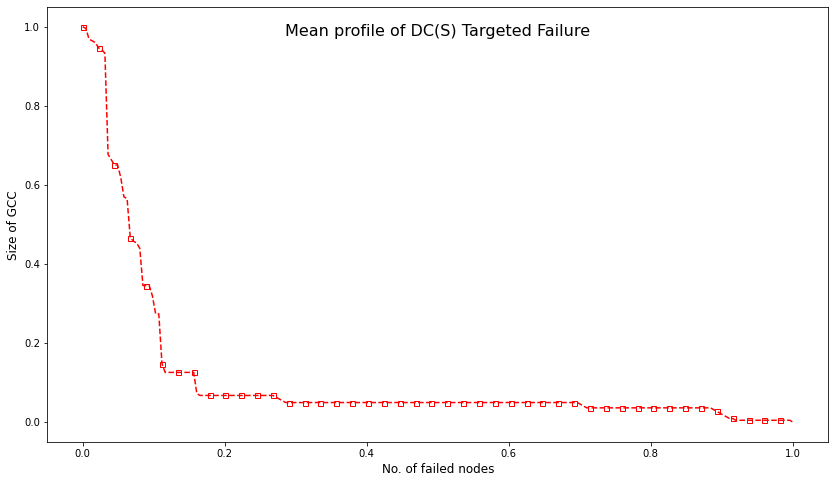

In [38]:
"""Plot Targeted Failure"""
plt.figure(figsize=(14,8))
plt.plot(node_fracf_T_d_T,gcc_sizes_d_T,'r--s', markevery=5, markerfacecolor='none', markersize=5) #Every Iter 2
plt.xlabel('No. of failed nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Failure')

plt.title('Mean profile of DC(S) Targeted Failure', y=0.92, fontsize='16')
plt.show()

In [12]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\W_Target_d_Top.npz',node_fracf_T_d_W,gcc_sizes_d_W)

In [17]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\B_Target_d_Top.npz',node_fracf_T_d_B,gcc_sizes_d_B)

In [20]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\C_Target_d_Top.npz',node_fracf_T_d_C,gcc_sizes_d_C)

In [24]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\D_Target_d_Top.npz',node_fracf_T_d_D,gcc_sizes_d_D)

In [27]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\P_Target_d_Top.npz',node_fracf_T_d_P,gcc_sizes_d_P)

In [30]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\S_Target_d_Top.npz',node_fracf_T_d_S,gcc_sizes_d_S)

In [33]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\L_Target_d_Top.npz',node_fracf_T_d_L,gcc_sizes_d_L)

In [36]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\N_Target_d_Top.npz',node_fracf_T_d_N,gcc_sizes_d_N)

In [39]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\T_Target_d_Top.npz',node_fracf_T_d_T,gcc_sizes_d_T)

In [54]:
## Normalized URTS Betweenness Centrality
l_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\W_Target_Top.npz')  # Ref
# --------------->><<-------------------
l_B=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\B_Target_Top.npz')
# --------------->><<-------------------
l_C=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\C_Target_Top.npz')
# --------------->><<-------------------
l_D=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\D_Target_Top.npz')
# --------------->><<-------------------
l_T=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\T_Target_Top.npz')
# --------------->><<-------------------
l_P=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\P_Target_Top.npz')
# --------------->><<-------------------
l_S=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\S_Target_Top.npz')
# --------------->><<-------------------
l_L=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\L_Target_Top.npz')
#---------------->><<--------------------
l_N=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Betweenness_C\N_Target_Top.npz')

## Normalized URTS Closeness Centrality
c_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\W_Target_c_Top.npz')  # Ref
# --------------->><<-------------------
c_B=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\B_Target_c_Top.npz')
# --------------->><<-------------------
c_C=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\C_Target_c_Top.npz')
# --------------->><<-------------------
c_D=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\D_Target_c_Top.npz')
# --------------->><<-------------------
c_T=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\T_Target_c_Top.npz')
# --------------->><<-------------------
c_P=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\P_Target_c_Top.npz')
# --------------->><<-------------------
c_S=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\S_Target_c_Top.npz')
# --------------->><<-------------------
c_L=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\L_Target_c_Top.npz')
#---------------->><<--------------------
c_N=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Closeness_C\N_Target_c_Top.npz')

## Normalized URTS Degree Centrality
d_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\W_Target_d_Top.npz')  # Ref
# --------------->><<-------------------
d_B=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\B_Target_d_Top.npz')
# --------------->><<-------------------
d_C=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\C_Target_d_Top.npz')
# --------------->><<-------------------
d_D=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\D_Target_d_Top.npz')
# --------------->><<-------------------
d_T=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\T_Target_d_Top.npz')
# --------------->><<-------------------
d_P=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\P_Target_d_Top.npz')
# --------------->><<-------------------
d_S=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\S_Target_d_Top.npz')
# --------------->><<-------------------
d_L=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\L_Target_d_Top.npz')
#---------------->><<--------------------
d_N=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Degree_C\N_Target_d_Top.npz')

## Normalized URTS Pagerank Centrality
e_W=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\W_Target_e_Top.npz')  # Ref
# --------------->><<-------------------
e_B=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\B_Target_e_Top.npz')
# --------------->><<-------------------
e_C=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\C_Target_e_Top.npz')
# --------------->><<-------------------
e_D=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\D_Target_e_Top.npz')
# --------------->><<-------------------
e_T=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\T_Target_e_Top.npz')
# --------------->><<-------------------
e_P=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\P_Target_e_Top.npz')
# --------------->><<-------------------
e_S=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\S_Target_e_Top.npz')
# --------------->><<-------------------
e_L=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\L_Target_e_Top.npz')
#---------------->><<--------------------
e_N=np.load(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Eigenvector_C\N_Target_e_Top.npz')



In [6]:
area_W = np.trapz(dr_W['arr_0'],dr_W['arr_1'])
print(abs(area_W))

0.08677735308170091


In [8]:
# calculate the area under the curve
area_W = np.trapz(e_W['arr_0'],e_W['arr_1'])
print(abs(area_W))
area_B = np.trapz(e_B['arr_0'],e_B['arr_1'])
print(abs(area_B))
area_C = np.trapz(e_C['arr_0'],e_C['arr_1'])
print(abs(area_C))
area_D = np.trapz(e_D['arr_0'],e_D['arr_1'])
print(abs(area_D))
area_T = np.trapz(e_T['arr_0'],e_T['arr_1'])
print(abs(area_T))
area_P = np.trapz(e_P['arr_0'],e_P['arr_1'])
print(abs(area_P))
area_S = np.trapz(e_S['arr_0'],e_S['arr_1'])
print(abs(area_S))
area_L = np.trapz(e_L['arr_0'],e_L['arr_1'])
print(abs(area_L))
area_N = np.trapz(e_N['arr_0'],e_N['arr_1'])
print(abs(area_N))


0.1376612517916866
0.2221205186880244
0.20782342657342656
0.29293156523798247
0.21737868353619474
0.23265141083644789
0.20214878110077908
0.259228740936058
0.17943555894838759


In [68]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=[28, 17],dpi=800)
# Adjust subplot spacing
plt.subplots_adjust(wspace=0.1, hspace=0.2)

labels = ['URTS', 'Random', 'Scale-Free']
colors = ['crimson', 'teal', 'green','indigo']
marker_style = ['s', '*', 'o', 'o']
Q = 2.25

plt.subplot(ax[0, 0]).plot(l_W['arr_0'], l_W['arr_1'], color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality', markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 0]).plot(c_W['arr_0'], c_W['arr_1'], color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality', markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 0]).plot(d_W['arr_0'], d_W['arr_1'], color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality', markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 0]).plot(e_W['arr_0'], e_W['arr_1'], color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality', markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 0]).legend(fontsize=15)
plt.subplot(ax[0, 0]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[0, 0]).set_title('Washington DC (N=91, E=93)', fontsize=20)


# --------------->><<-------------------

plt.subplot(ax[0, 1]).plot(l_B['arr_0'],l_B['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 1]).plot(c_B['arr_0'],c_B['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 1]).plot(d_B['arr_0'],d_B['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 1]).plot(e_B['arr_0'],e_B['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 1]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[0, 1]).set_title('Boston (N=114, E=115)', fontsize=20)


# --------------->><<-------------------

plt.subplot(ax[0, 2]).plot(l_C['arr_0'],l_C['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 2]).plot(c_C['arr_0'],c_C['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 2]).plot(d_C['arr_0'],d_C['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 2]).plot(e_C['arr_0'],e_C['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[0, 2]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[0, 2]).set_title('Chicago (N=143, E=149)', fontsize=20)


# --------------->><<-------------------

plt.subplot(ax[1, 0]).plot(l_D['arr_0'],l_D['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 0]).plot(c_D['arr_0'],c_D['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 0]).plot(d_D['arr_0'],d_D['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 0]).plot(e_D['arr_0'],e_D['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 0]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[1, 0]).set_title('Delhi (N=205, E=216)', fontsize=20)

# --------------->><<-------------------

plt.subplot(ax[1, 1]).plot(l_T['arr_0'],l_T['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 1]).plot(c_T['arr_0'],c_T['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 1]).plot(d_T['arr_0'],d_T['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 1]).plot(e_T['arr_0'],e_T['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 1]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[1, 1]).set_title('Tokyo (N=223, E=268)', fontsize=20)

# --------------->><<-------------------

plt.subplot(ax[1, 2]).plot(l_P['arr_0'],l_P['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 2]).plot(c_P['arr_0'],c_P['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 2]).plot(d_P['arr_0'],d_P['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 2]).plot(e_P['arr_0'],e_P['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[1, 2]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[1, 2]).set_title('Paris (N=302, E=358)', fontsize=20)

# --------------->><<-------------------

plt.subplot(ax[2, 0]).plot(l_S['arr_0'],l_S['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 0]).plot(c_S['arr_0'],c_S['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 0]).plot(d_S['arr_0'],d_S['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 0]).plot(e_S['arr_0'],e_S['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 0]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[2, 0]).set_title('Shanghai (N=345, E=397)', fontsize=20)


# --------------->><<-------------------

plt.subplot(ax[2, 1]).plot(l_L['arr_0'],l_L['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 1]).plot(c_L['arr_0'],c_L['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 1]).plot(d_L['arr_0'],d_L['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 1]).plot(e_L['arr_0'],e_L['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 1]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[2, 1]).set_title('London (N=369, E=430)', fontsize=20)

# --------------->><<-------------------

plt.subplot(ax[2, 2]).plot(l_N['arr_0'],l_N['arr_1'],color=colors[0], linestyle='--', marker=marker_style[0], label='Betweenness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 2]).plot(c_N['arr_0'],c_N['arr_1'],color=colors[1], linestyle='--', marker=marker_style[1], label='Closeness Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 2]).plot(d_N['arr_0'],d_N['arr_1'],color=colors[2], linestyle='--', marker=marker_style[2], label='Degree Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 2]).plot(e_N['arr_0'],e_N['arr_1'],color=colors[3], linestyle='--', marker=marker_style[3], label='Eigenvector Centrality',markevery=30, markerfacecolor='none', markersize=8,linewidth=Q)
plt.subplot(ax[2, 2]).tick_params(axis='both', labelsize=13)
plt.subplot(ax[2, 2]).set_title('New York (N=463, E=510)', fontsize=20)


# --------------->><<-------------------


fig.text(0.50, 0.07, 'Fraction of Inaccessible Stations → ', ha='center',fontsize='20')
fig.text(0.09, 0.5, '← Giant Connected Component (Proxy of Connectivity)', va='center', rotation='vertical',fontsize='20')
plt.suptitle('Intercomparison of Network Centrality Based Failure Strategies', y=.94, fontsize='24')
#plt.tight_layout()
#plt.figlegend( labels, fontsize=22, loc = 'lower center', ncol=5, labelspacing=0. )
#plt.savefig(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Top_Target\Top_nor_cen_9.png')
plt.show()


# Recovery

In [50]:
#Follow Serial of graphs = [G_W, G_B, G_C, G_D, G_T, G_P, G_S, G_L, G_N] TOTAL 15

d_cen_N = nx.degree_centrality(G_N)                                                    #Every Iter 2
d_cen_N = {k: v for k, v in sorted(d_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2

node_d_list_N = list(d_cen_N.keys()) #Every Iter2

gcc_sizes_d_N, updated_G_N = remove_nodes(G_N, node_d_list_N, edge_list_N) #Every Iter4

In [51]:
# Degree
d_cen_N = nx.degree_centrality(G_N)                                                    #Every Iter 2
d_cen_N = {k: v for k, v in sorted(d_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2
node_list_d_N = list(d_cen_N.keys()) #Every Iter2

# Betweenness
b_cen_N = nx.betweenness_centrality(G_N)                                                    #Every Iter 2
b_cen_N = {k: v for k, v in sorted(b_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2
node_list_b_N = list(b_cen_N.keys()) #Every Iter2

# Closeness
c_cen_N = nx.closeness_centrality(G_N)                                                    #Every Iter 2
c_cen_N = {k: v for k, v in sorted(c_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2
node_list_c_N = list(c_cen_N.keys()) #Every Iter2

# Eigenvector
e_cen_N = nx.eigenvector_centrality(G_N, max_iter=1000)                                                    #Every Iter 2
e_cen_N = {k: v for k, v in sorted(e_cen_N.items(), key=lambda item: item[1],reverse=True)} #Every Iter 2
node_list_e_N = list(e_cen_N.keys()) #Every Iter2

re_gcc_sizes_d_N, re_updated_G_N = add_nodes(G_N, updated_G_N, node_list_d_N, edge_list_N)
re_gcc_sizes_b_N, re_updated_G_N = add_nodes(G_N, updated_G_N, node_list_b_N, edge_list_N)
re_gcc_sizes_c_N, re_updated_G_N = add_nodes(G_N, updated_G_N, node_list_c_N, edge_list_N)
re_gcc_sizes_e_N, re_updated_G_N = add_nodes(G_N, updated_G_N, node_list_e_N, edge_list_N)

re_gcc_sizes_d_N = normalize_gc_list(re_gcc_sizes_d_N)
re_gcc_sizes_b_N = normalize_gc_list(re_gcc_sizes_b_N)
re_gcc_sizes_c_N = normalize_gc_list(re_gcc_sizes_c_N)
re_gcc_sizes_e_N = normalize_gc_list(re_gcc_sizes_e_N)  #Every Iter2

node_gcc_sizes_d_N = np.arange(len(re_gcc_sizes_d_N))/(len(re_gcc_sizes_d_N)-1)
node_gcc_sizes_b_N = np.arange(len(re_gcc_sizes_b_N))/(len(re_gcc_sizes_b_N)-1)
node_gcc_sizes_c_N = np.arange(len(re_gcc_sizes_c_N))/(len(re_gcc_sizes_c_N)-1)
node_gcc_sizes_e_N = np.arange(len(re_gcc_sizes_e_N))/(len(re_gcc_sizes_e_N)-1) #Every Iter3


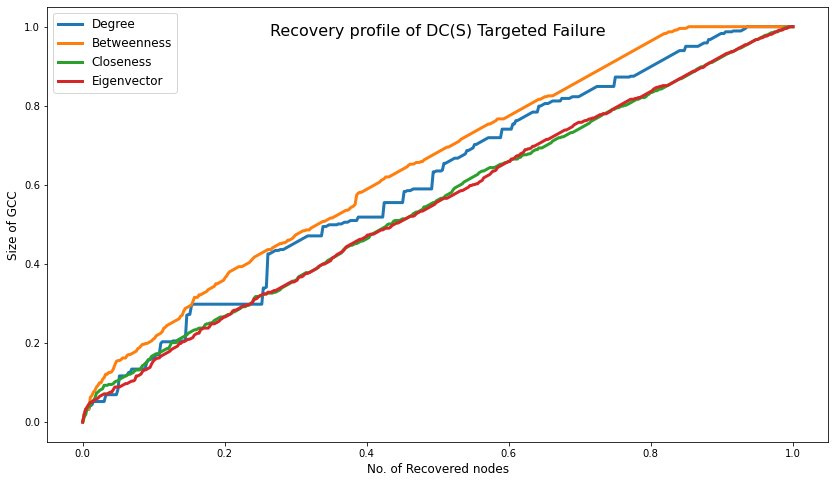

In [52]:
"""Plot Strategic Recovery"""
plt.figure(figsize=(14,8))
plt.plot(node_gcc_sizes_d_N,re_gcc_sizes_d_N, label='Degree', linewidth=3)
plt.plot(node_gcc_sizes_b_N,re_gcc_sizes_b_N, label='Betweenness', linewidth=3)
plt.plot(node_gcc_sizes_c_N,re_gcc_sizes_c_N, label='Closeness', linewidth=3)
plt.plot(node_gcc_sizes_e_N,re_gcc_sizes_e_N, label='Eigenvector', linewidth=3)
plt.xlabel('No. of Recovered nodes', fontsize=12)
plt.ylabel('Size of GCC', fontsize=12)
plt.title('Recovery')
plt.legend(fontsize=12)
plt.title('Recovery profile of DC(S) Targeted Failure', y=0.92, fontsize='16')
plt.show()


In [21]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\W_Recov_d.npz',node_gcc_sizes_d_W,re_gcc_sizes_d_W)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\W_Recov_b.npz',node_gcc_sizes_b_W,re_gcc_sizes_b_W)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\W_Recov_c.npz',node_gcc_sizes_c_W,re_gcc_sizes_c_W)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\W_Recov_e.npz',node_gcc_sizes_e_W,re_gcc_sizes_e_W)


In [26]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\B_Recov_d.npz',node_gcc_sizes_d_B,re_gcc_sizes_d_B)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\B_Recov_b.npz',node_gcc_sizes_b_B,re_gcc_sizes_b_B)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\B_Recov_c.npz',node_gcc_sizes_c_B,re_gcc_sizes_c_B)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\B_Recov_e.npz',node_gcc_sizes_e_B,re_gcc_sizes_e_B)


In [31]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\C_Recov_d.npz',node_gcc_sizes_d_C,re_gcc_sizes_d_C)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\C_Recov_b.npz',node_gcc_sizes_b_C,re_gcc_sizes_b_C)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\C_Recov_c.npz',node_gcc_sizes_c_C,re_gcc_sizes_c_C)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\C_Recov_e.npz',node_gcc_sizes_e_C,re_gcc_sizes_e_C)


In [36]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\D_Recov_d.npz',node_gcc_sizes_d_D,re_gcc_sizes_d_D)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\D_Recov_b.npz',node_gcc_sizes_b_D,re_gcc_sizes_b_D)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\D_Recov_c.npz',node_gcc_sizes_c_D,re_gcc_sizes_c_D)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\D_Recov_e.npz',node_gcc_sizes_e_D,re_gcc_sizes_e_D)


In [15]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\T_Recov_d.npz',node_gcc_sizes_d_T,re_gcc_sizes_d_T)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\T_Recov_b.npz',node_gcc_sizes_b_T,re_gcc_sizes_b_T)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\T_Recov_c.npz',node_gcc_sizes_c_T,re_gcc_sizes_c_T)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\T_Recov_e.npz',node_gcc_sizes_e_T,re_gcc_sizes_e_T)


In [40]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\P_Recov_d.npz',node_gcc_sizes_d_P,re_gcc_sizes_d_P)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\P_Recov_b.npz',node_gcc_sizes_b_P,re_gcc_sizes_b_P)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\P_Recov_c.npz',node_gcc_sizes_c_P,re_gcc_sizes_c_P)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\P_Recov_e.npz',node_gcc_sizes_e_P,re_gcc_sizes_e_P)


In [44]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\S_Recov_d.npz',node_gcc_sizes_d_S,re_gcc_sizes_d_S)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\S_Recov_b.npz',node_gcc_sizes_b_S,re_gcc_sizes_b_S)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\S_Recov_c.npz',node_gcc_sizes_c_S,re_gcc_sizes_c_S)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\S_Recov_e.npz',node_gcc_sizes_e_S,re_gcc_sizes_e_S)


In [49]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\L_Recov_d.npz',node_gcc_sizes_d_L,re_gcc_sizes_d_L)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\L_Recov_b.npz',node_gcc_sizes_b_L,re_gcc_sizes_b_L)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\L_Recov_c.npz',node_gcc_sizes_c_L,re_gcc_sizes_c_L)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\L_Recov_e.npz',node_gcc_sizes_e_L,re_gcc_sizes_e_L)


In [53]:
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\N_Recov_d.npz',node_gcc_sizes_d_N,re_gcc_sizes_d_N)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\N_Recov_b.npz',node_gcc_sizes_b_N,re_gcc_sizes_b_N)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\N_Recov_c.npz',node_gcc_sizes_c_N,re_gcc_sizes_c_N)
np.savez(r'G:\My Drive\Ashis_Studies_NU\Nine_URTS_Results\Recovery\N_Recov_e.npz',node_gcc_sizes_e_N,re_gcc_sizes_e_N)


In [3]:
# Read the Excel file into a pandas DataFrame
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdFi77UN-Dt_C72YlkKU_SxsXxV77DuA-hxC4Rp2UiZeR61pnHORyPqStZWzm2Z-4KubjXKAEXH4s8/pub?gid=0&single=true&output=csv')
df2

URTS  Nodes  Edges  Avg. Deg  Avg. SPL  Betweenness_Cen  \
0  Washington DC     91     93    2.0440    11.509         0.097408   
1         Boston    114    115    2.0175    13.954         0.085126   
2        Chicago    143    149    2.0839    15.992         0.075782   
3          Delhi    205    216    2.1073    17.083         0.106192   
4          Tokyo    223    268    2.4036    10.643         0.118704   
5          Paris    302    358    2.3709    11.977         0.089120   
6       Shanghai    345    397    2.3014    16.003         0.097885   
7         London    369    430    2.3306    13.733         0.090797   
8       New York    463    510    2.2030    19.690         0.076392   

   Degree_Cen  Closeness_Cen  EigenV_Cen  Random_Failure  Flooding_Failure  
0    0.098244       0.139572    0.137661        0.186126          0.223555  
1    0.134096       0.123494    0.222120        0.152601          0.196301  
2    0.096469       0.178443    0.207823        0.143427          0.105755  
3    0.102214       0.235176    0.292932        0.161037          0.169185  
4    0.111177       0.206869    0.217379        0.247169          0.219433  
5    0.075481       0.233263    0.232651        0.222025          0.209894  
6    0.084297       0.181876    0.202149        0.184563          0.203897  
7    0.086190       0.233095    0.259229        0.200765          0.203465  
8    0.059719       0.156944    0.179436        0.146531          0.158400

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create inverted boxplots
plt.figure(figsize=(12, 6),dpi = 500)
plt.boxplot([df2['Betweenness_Cen'], df2['Degree_Cen'], df2['Closeness_Cen'], df2['EigenV_Cen'], df2['Random']], vert=True)  # vert=True inverts the axes
plt.xticks([1, 2, 3, 4, 5], ['Betweenness', 'Degree', 'Closeness', 'EigenVector', 'Random'])
plt.title('Robustness Scores of Recovery Strategies for 9 Urban Rail Transportation Networks')
plt.ylabel('Score')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [27]:
import seaborn as sns
import textwrap

# Assuming df2 is your dataframe
columns_of_interest = ['Betweenness_Cen', 'Degree_Cen', 'Closeness_Cen', 'EigenV_Cen', 'Random_Failure', 'Flooding_Failure']

# Select only the columns you are interested in
df_selected = df2[columns_of_interest]

# Melt the dataframe to make it suitable for boxplot
df_melted = pd.melt(df_selected)

# Create the boxplot
plt.figure(figsize=(12,10),dpi=1200)
sns.boxplot(x='variable', y='value', data=df_melted, linewidth=3, palette="coolwarm",boxprops=dict(edgecolor="black"))
plt.title('Robustness Score of Failure and Attack Strategies ', fontsize=30)
plt.xlabel('Strategies')
plt.ylabel('Robustness Scores')
plt.tick_params(axis='both', labelsize=14)
plt.xticks(rotation=60)
plt.xticks(range(len(df_melted['variable'].unique())), [textwrap.fill(label, 10) for label in df_melted['variable'].unique()])
plt.tight_layout()
plt.show()